In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('DS_Sber.csv', sep=';')
data.columns = data.columns.str.lower()
data['reportdate'] = data['reportdate'].str.replace('.', '/')
data["reportdate"] = pd.to_datetime(data["reportdate"], infer_datetime_format=True)

data.head(10)

C:\Temp\ipykernel_7948\4256145899.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['reportdate'] = data['reportdate'].str.replace('.', '/')


reportdate       value
0 2013-12-30  3457625638
1 2013-12-31  3417092149
2 2014-01-01  3417092149
3 2014-01-02  3417092149
4 2014-01-03  3417092149
5 2014-01-04  3417092149
6 2014-01-05  3417092149
7 2014-01-06  3320846785
8 2014-01-07  3320846785
9 2014-01-08  3630283744

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   reportdate  2111 non-null   datetime64[ns]
 1   value       2111 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 33.1 KB


In [4]:
data.describe()

value
count  2.111000e+03
mean   3.389668e+10
std    1.875474e+10
min    3.282810e+09
25%    1.824160e+10
50%    3.021352e+10
75%    4.758339e+10
max    7.822860e+10

In [29]:
from sklearn.linear_model import LinearRegression

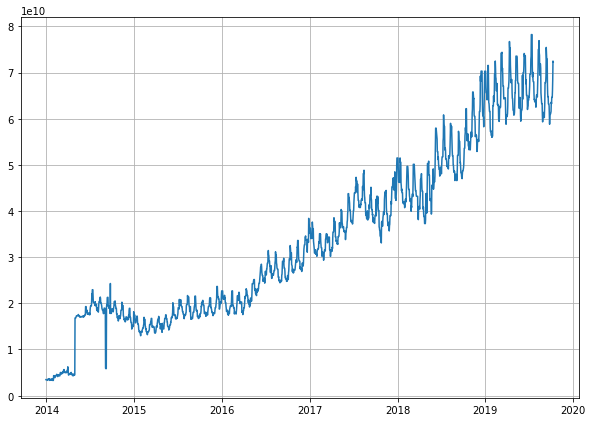

In [30]:
plt.figure(figsize=(10, 7))

plt.grid(True)
plt.plot(data.reportdate, data.value)

plt.show()

In [31]:
df = data['value'].values.reshape((-1, 1))
dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8):])

In [32]:
def create_dataset(df, window):
    x = []
    y = []
    for i in range(window, df.shape[0]):
        x.append(df[i-window:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return (x, y)

In [63]:
window = 30 * 1

x_train, y_train = create_dataset(dataset_train, window)
x_test, y_test = create_dataset(dataset_test, window)

x_train, y_train

(array([[ 3457625638,  3417092149,  3417092149, ...,  3330499862,
          3305963251,  3640022952],
        [ 3417092149,  3417092149,  3417092149, ...,  3305963251,
          3640022952,  3282809762],
        [ 3417092149,  3417092149,  3417092149, ...,  3640022952,
          3282809762,  3355289333],
        ...,
        [58962032580, 58349708728, 58349708728, ..., 57112428131,
         58999288196, 57402158309],
        [58349708728, 58349708728, 58349708728, ..., 58999288196,
         57402158309, 57402158309],
        [58349708728, 58349708728, 54202380720, ..., 57402158309,
         57402158309, 57402158309]], dtype=int64),
 array([ 3282809762,  3355289333,  4333581643, ..., 57402158309,
        57402158309, 58370584299], dtype=int64))

In [64]:
clf = LinearRegression()
clf.fit(x_train, y_train)
accuracy = clf.score(x_test, y_test)

accuracy

0.9327779373204432

In [65]:
x_data = df[-window:].reshape(1, window)

prediction = clf.predict(x_data)
prediction

array([7.22136353e+10])

In [66]:
nswr = df.copy()

for _ in range(window):
    x_data = nswr[-window:].reshape(1, window)
    
    prediction = clf.predict(x_data)
    
    nswr = np.append(nswr, prediction)
    

nswr[-window:]

array([7.22136353e+10, 7.27726756e+10, 7.25676866e+10, 7.19188056e+10,
       7.08138742e+10, 6.99989678e+10, 6.94644109e+10, 6.87415073e+10,
       6.79844764e+10, 6.75554420e+10, 6.71218834e+10, 6.60557645e+10,
       6.55790796e+10, 6.50965142e+10, 6.49070253e+10, 6.41730340e+10,
       6.38144223e+10, 6.38223637e+10, 6.37239223e+10, 6.43027295e+10,
       6.43823585e+10, 6.47733200e+10, 6.51955120e+10, 6.54942748e+10,
       6.59480932e+10, 6.66779711e+10, 6.78011958e+10, 6.84602532e+10,
       6.90089989e+10, 6.95265568e+10])

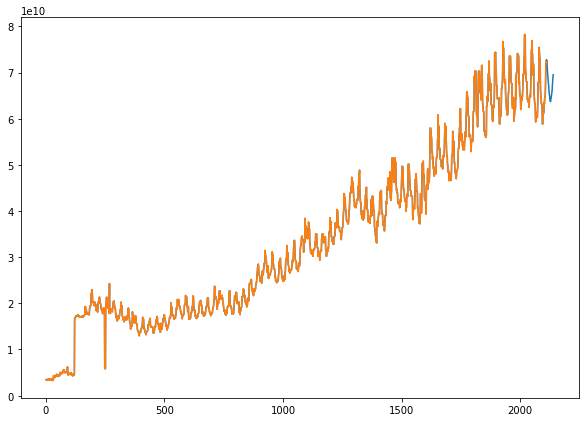

In [67]:
plt.figure(figsize=(10, 7))

plt.plot(nswr)
plt.plot(df)

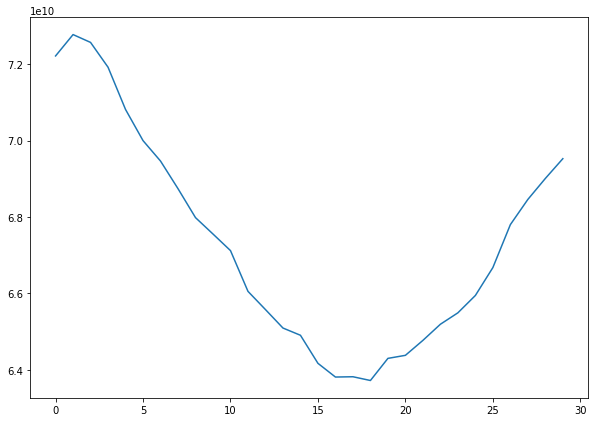

In [68]:
plt.figure(figsize=(10, 7))

plt.plot(nswr[-window:])

In [69]:
nswr[-1], df[-1]

(69526556818.49867, array([72307860851], dtype=int64))

In [106]:
df = data['value'].values.reshape((-1, 1))
dataset_train = np.array(df)

window = 30 * 12

x_train, y_train = create_dataset(dataset_train, window)

x_train, y_train

(array([[ 3457625638,  3417092149,  3417092149, ..., 14423922093,
         14593843621, 14801571032],
        [ 3417092149,  3417092149,  3417092149, ..., 14593843621,
         14801571032, 14769266649],
        [ 3417092149,  3417092149,  3417092149, ..., 14801571032,
         14769266649, 15233591723],
        ...,
        [62173977750, 62173977750, 57047798521, ..., 64630140507,
         64630140507, 66115288637],
        [62173977750, 57047798521, 56096390677, ..., 64630140507,
         66115288637, 68424049766],
        [57047798521, 56096390677, 55210498279, ..., 66115288637,
         68424049766, 72492897583]], dtype=int64),
 array([14769266649, 15233591723, 15233591723, ..., 68424049766,
        72492897583, 72307860851], dtype=int64))

In [107]:
clf = LinearRegression()
clf.fit(x_train, y_train)
accuracy = clf.score(x_train, y_train)

accuracy

0.9972750343159179

In [108]:
nswr = df.copy()

for _ in range(window):
    x_data = nswr[-window:].reshape(1, window)
    
    prediction = clf.predict(x_data)
    
    nswr = np.append(nswr, prediction)
    

nswr[-window:]

array([7.67936371e+10, 7.73826751e+10, 7.59725882e+10, 7.44304669e+10,
       7.07223885e+10, 6.90999065e+10, 6.85010207e+10, 6.80594539e+10,
       6.82216939e+10, 6.71258628e+10, 6.45889008e+10, 6.25284668e+10,
       6.10214236e+10, 6.13370179e+10, 6.14505869e+10, 6.14185050e+10,
       6.08372429e+10, 6.04239125e+10, 5.97699906e+10, 6.26107065e+10,
       6.31947802e+10, 6.44485495e+10, 6.49338598e+10, 6.57473183e+10,
       6.73928159e+10, 6.74068854e+10, 7.03980559e+10, 7.15061758e+10,
       7.33868878e+10, 7.49813395e+10, 7.47872663e+10, 7.53541883e+10,
       7.46144853e+10, 7.42663646e+10, 7.34042241e+10, 7.25977273e+10,
       7.15019985e+10, 7.21773289e+10, 6.96994095e+10, 6.80708580e+10,
       6.51665490e+10, 6.35309621e+10, 6.29114425e+10, 6.26960139e+10,
       6.32509582e+10, 6.11943081e+10, 6.05855827e+10, 5.99048826e+10,
       6.05991111e+10, 6.26467191e+10, 6.49083687e+10, 6.48070237e+10,
       6.59936375e+10, 6.48071912e+10, 6.59934000e+10, 6.85264765e+10,
      

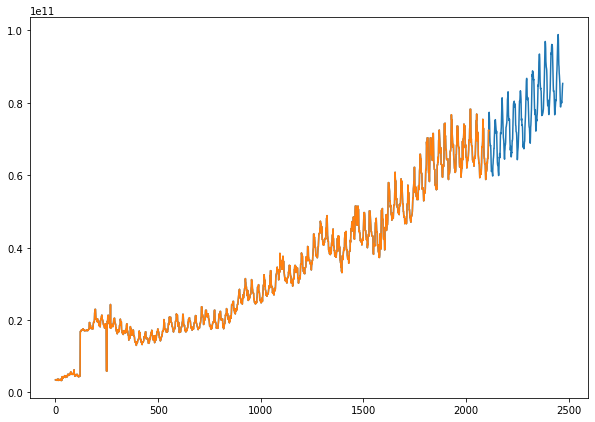

In [109]:
plt.figure(figsize=(10, 7))

plt.plot(nswr)
plt.plot(df)

In [110]:
a = np.datetime64('2019-02-01')

dates = np.array([]).astype('datetime64')

for i in range(window):
    a += np.timedelta64(1, 'D')
    
    dates = np.append(dates, a)
    
dates

array(['2019-02-02', '2019-02-03', '2019-02-04', '2019-02-05',
       '2019-02-06', '2019-02-07', '2019-02-08', '2019-02-09',
       '2019-02-10', '2019-02-11', '2019-02-12', '2019-02-13',
       '2019-02-14', '2019-02-15', '2019-02-16', '2019-02-17',
       '2019-02-18', '2019-02-19', '2019-02-20', '2019-02-21',
       '2019-02-22', '2019-02-23', '2019-02-24', '2019-02-25',
       '2019-02-26', '2019-02-27', '2019-02-28', '2019-03-01',
       '2019-03-02', '2019-03-03', '2019-03-04', '2019-03-05',
       '2019-03-06', '2019-03-07', '2019-03-08', '2019-03-09',
       '2019-03-10', '2019-03-11', '2019-03-12', '2019-03-13',
       '2019-03-14', '2019-03-15', '2019-03-16', '2019-03-17',
       '2019-03-18', '2019-03-19', '2019-03-20', '2019-03-21',
       '2019-03-22', '2019-03-23', '2019-03-24', '2019-03-25',
       '2019-03-26', '2019-03-27', '2019-03-28', '2019-03-29',
       '2019-03-30', '2019-03-31', '2019-04-01', '2019-04-02',
       '2019-04-03', '2019-04-04', '2019-04-05', '2019-

In [111]:
total_nswr = pd.DataFrame({'dates': dates, 'values': nswr[-window:]})

total_nswr

dates        values
0   2019-02-02  7.679364e+10
1   2019-02-03  7.738268e+10
2   2019-02-04  7.597259e+10
3   2019-02-05  7.443047e+10
4   2019-02-06  7.072239e+10
..         ...           ...
355 2020-01-23  8.050997e+10
356 2020-01-24  8.206038e+10
357 2020-01-25  8.318309e+10
358 2020-01-26  8.466672e+10
359 2020-01-27  8.535033e+10

[360 rows x 2 columns]

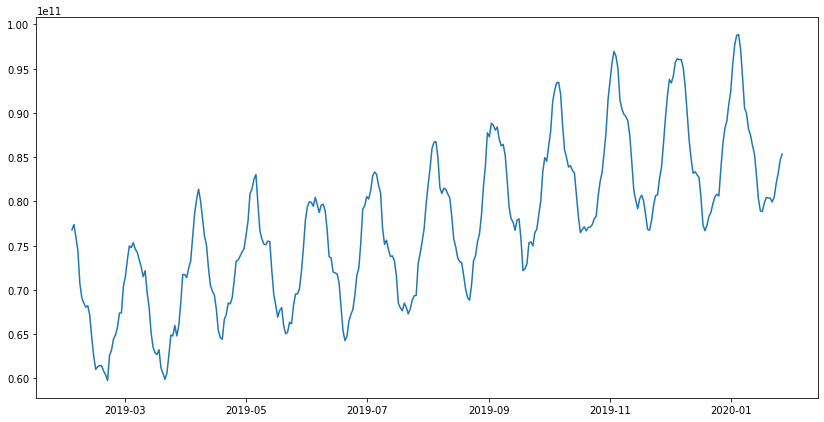

In [112]:
plt.figure(figsize=(14, 7))

plt.plot(total_nswr.dates, total_nswr['values'])